# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regreción Lineal: Lección 6 - Estandarización**
---

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

pd.options.display.max_columns = None

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:


In [2]:
df = pd.read_csv('datos/soci_econ_country_profiles_normalizado.csv', index_col = 0)
df.head(2)

country        region  restaurant_price_index  population_2017  \
0  Argentina  SouthAmerica                   50.37          44271.0   
1  Australia       Oceania                   77.12          24451.0   

   employment_agriculture  employment_industry  employment_services  \
0                     2.0                 24.8                 73.1   
1                     2.7                 21.2                 76.1   

   education  quality_of_life_index  purchasing_power_index  safety_index  \
0        5.3                 139.59                   58.40         37.37   
1        5.2                 176.54                  101.94         57.58   

   cost_of_living  consumer_price_index  human_capital_index  inflation  \
0           52.57            112.887108                0.611   2.834056   
1           80.66            115.686785                0.803   1.948647   

   urban_population  population_age_distribution_0_14  \
0            91.749                              24.9   
1            85.904                              19.0   

   population_age_distribution_60_plus  international_migrant_stock  \
0                                 15.4                          4.8   
1                                 21.0                         28.2   

   restaurant_price_index_normal  
0                       4.246653  
1                       4.749998

Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.


In [3]:
df_numericas = df.select_dtypes(include= np.number).drop(['restaurant_price_index', 'restaurant_price_index_normal'], axis=1)
df_numericas

population_2017  employment_agriculture  employment_industry  \
0           44271.0                     2.0                 24.8   
1           24451.0                     2.7                 21.2   
2            8736.0                     4.7                 25.6   
3            9468.0                     9.6                 32.0   
4           11429.0                     1.2                 21.2   
..              ...                     ...                  ...   
61           9400.0                     3.5                 21.1   
62          66182.0                     1.2                 18.4   
63         324460.0                     1.5                 17.2   
64          31977.0                    11.9                 26.8   
65          95541.0                    41.8                 22.9   

    employment_services  education  quality_of_life_index  \
0                  73.1   5.300000                 139.59   
1                  76.1   5.200000                 176.54   
2                  69.7   5.500000                 190.37   
3                  58.4   4.900000                 119.23   
4                  77.6   6.600000                 160.52   
..                  ...        ...                    ...   
61                 75.4 -99.000000                 139.27   
62                 80.4   5.700000                 172.87   
63                 81.3   5.400000                 179.73   
64                 61.3  -0.210554                   0.00   
65                 35.2   5.700000                  36.12   

    purchasing_power_index  safety_index  cost_of_living  \
0                    58.40         37.37           52.57   
1                   101.94         57.58           80.66   
2                    95.66         80.75           71.52   
3                    36.43         77.74           33.84   
4                    91.02         55.49           75.36   
..                     ...           ...             ...   
61                  116.77         79.34           67.98   
62                   96.85         58.81           69.49   
63                  123.17         51.24           75.42   
64                    3.35         14.72           38.30   
65                   24.77         47.04           40.11   

    consumer_price_index  human_capital_index  inflation  urban_population  \
0             112.887108             0.611000   2.834056            91.749   
1             115.686785             0.803000   1.948647            85.904   
2             113.999737             0.793000   2.081269            58.094   
3             138.531660             0.694371   6.031837            78.134   
4             113.128903             0.757000   2.125971            97.961   
..                   ...                  ...        ...               ...   
61            113.302921             0.659000   1.966826            86.248   
62            114.943592             0.781000   2.557756            83.143   
63            112.411557             0.762000   2.130110            82.058   
64            176.816492             0.522171   7.670487            88.183   
65            153.631652             0.666000   3.520257            35.213   

    population_age_distribution_0_14  population_age_distribution_60_plus  \
0                               24.9                                 15.4   
1                               19.0                                 21.0   
2                               14.1                                 25.1   
3                               16.7                                 21.3   
4                               17.1                                 24.6   
..                               ...                                  ...   
61                              13.9                                  2.4   
62                              17.7                                 23.9   
63                              18.9                                 21.5   
64                        

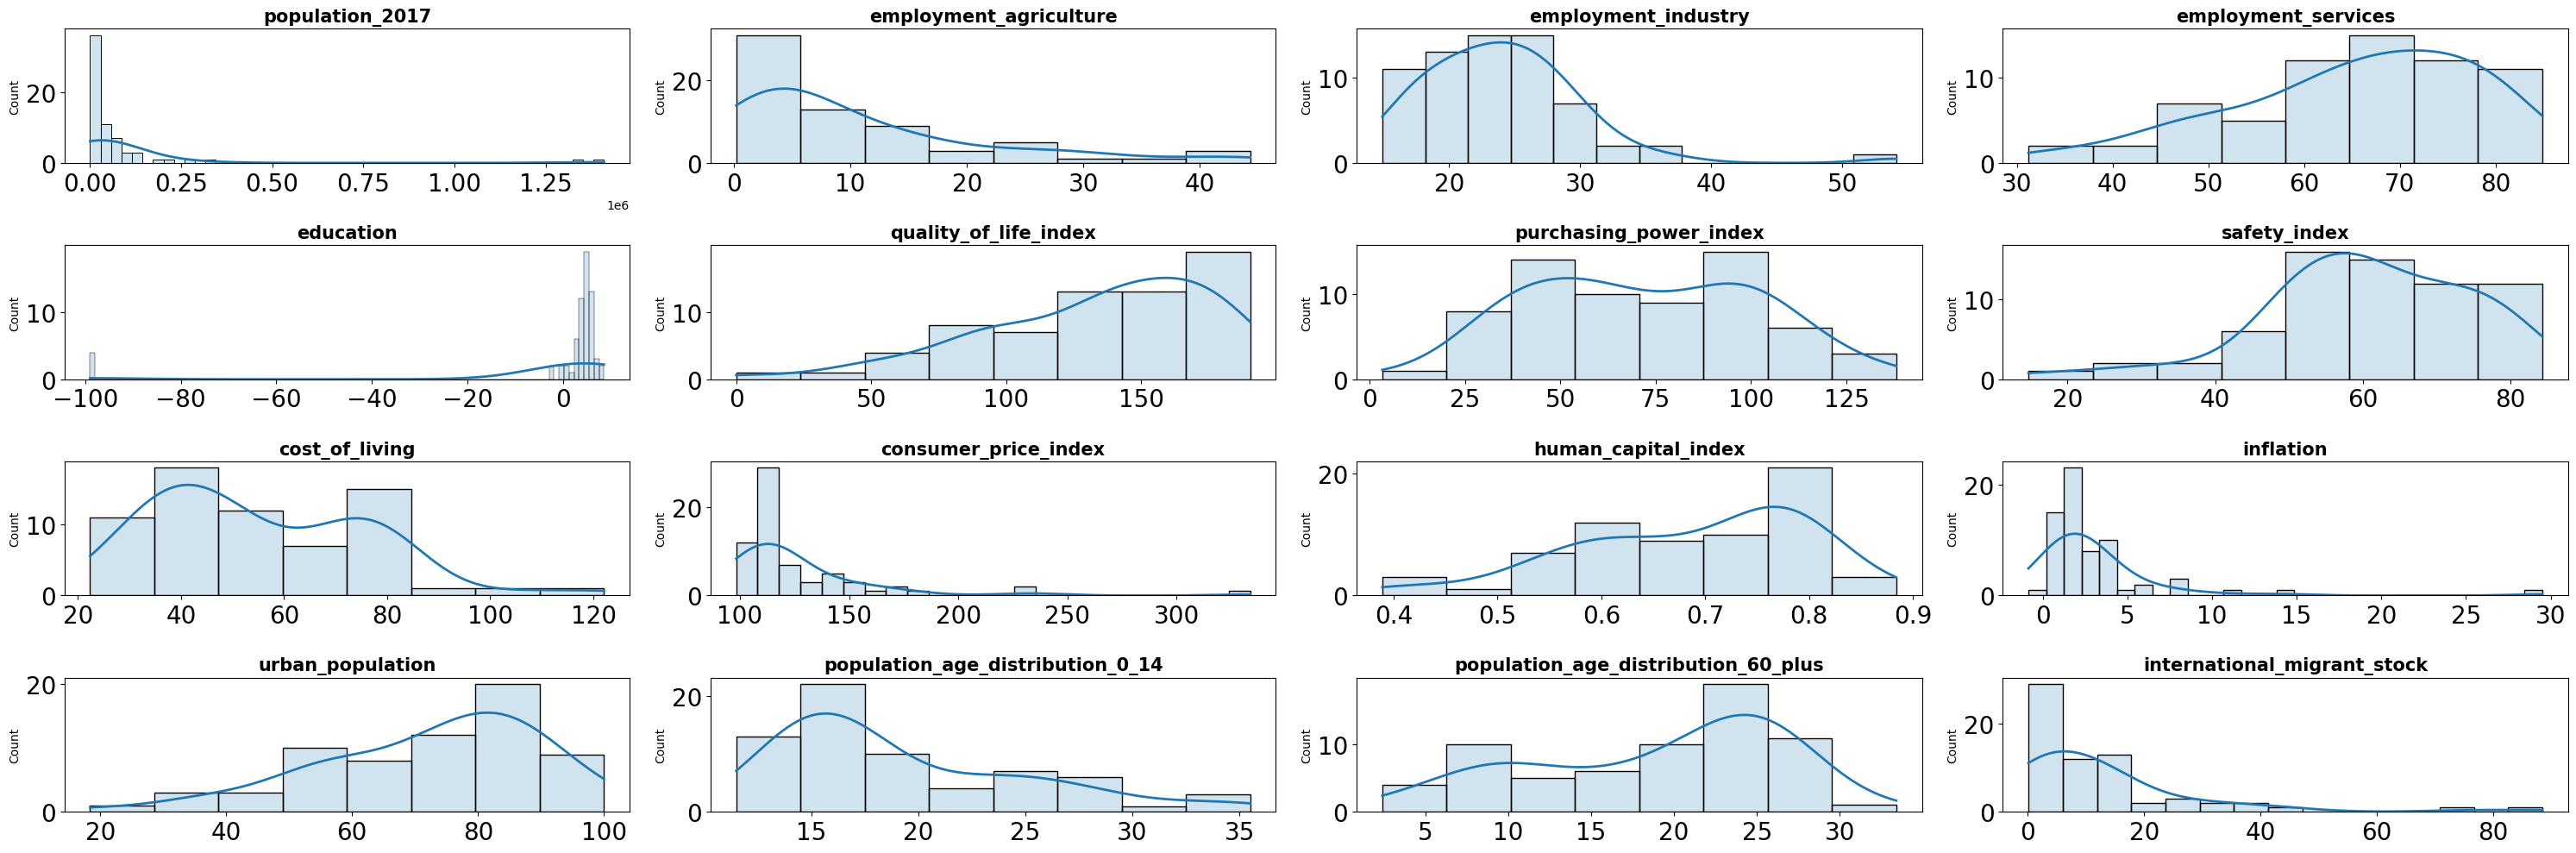

In [4]:
# vamos a sacar los histogramas de las predictoras numéricas para poder compararlos después de la estandarización
fig, axes = plt.subplots(4,4 , figsize = (30, 10))

columnas_num = df_numericas.columns
axes = axes.flat

for i, colum in enumerate(columnas_num): 
    sns.histplot(
        data = df_numericas,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

In [5]:
#utilizamos el método ROBUSTSCALER porque tenemos outliers
robust = RobustScaler()

In [6]:
robust.fit(df_numericas)

RobustScaler()

In [7]:
X_robust = robust.transform(df_numericas)

In [8]:
numericas_robust = pd.DataFrame(X_robust, columns = df_numericas.columns)
numericas_robust.head(2)

population_2017  employment_agriculture  employment_industry  \
0         0.432582               -0.331263             0.131944   
1         0.095085               -0.273292            -0.368056   

   employment_services  education  quality_of_life_index  \
0             0.315638   0.258824              -0.022740   
1             0.487805   0.211765               0.550795   

   purchasing_power_index  safety_index  cost_of_living  consumer_price_index  \
0               -0.243315     -1.258757        0.080347             -0.036551   
1                0.660990     -0.139554        0.893666              0.102195   

   human_capital_index  inflation  urban_population  \
0            -0.572700   0.374915          0.605509   
1             0.566766  -0.030665          0.393466   

   population_age_distribution_0_14  population_age_distribution_60_plus  \
0                          0.927114                            -0.437736   
1                          0.239067                            -0.015094   

   international_migrant_stock  
0                    -0.307692  
1                     1.538462

In [9]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna population_2017 es:  1.1525352887770197
La desviación estándar de la columna population_2017 es: 4.055641125765196
-------------------------------------------------------------
La media de la columna employment_agriculture es:  0.37894472677081387
La desviación estándar de la columna employment_agriculture es: 0.9094464447951396
-------------------------------------------------------------
La media de la columna employment_industry es:  0.028619528619528413
La desviación estándar de la columna employment_industry es: 0.8603978600687393
-------------------------------------------------------------
La media de la columna employment_services es:  -0.12877700969523032
La desviación estándar de la columna employment_services es: 0.7294956766683363
-------------------------------------------------------------
La media de la columna education es:  -3.1280242618763294
La desviación estándar de la columna education es: 11.73471674525489
-----------------------------------

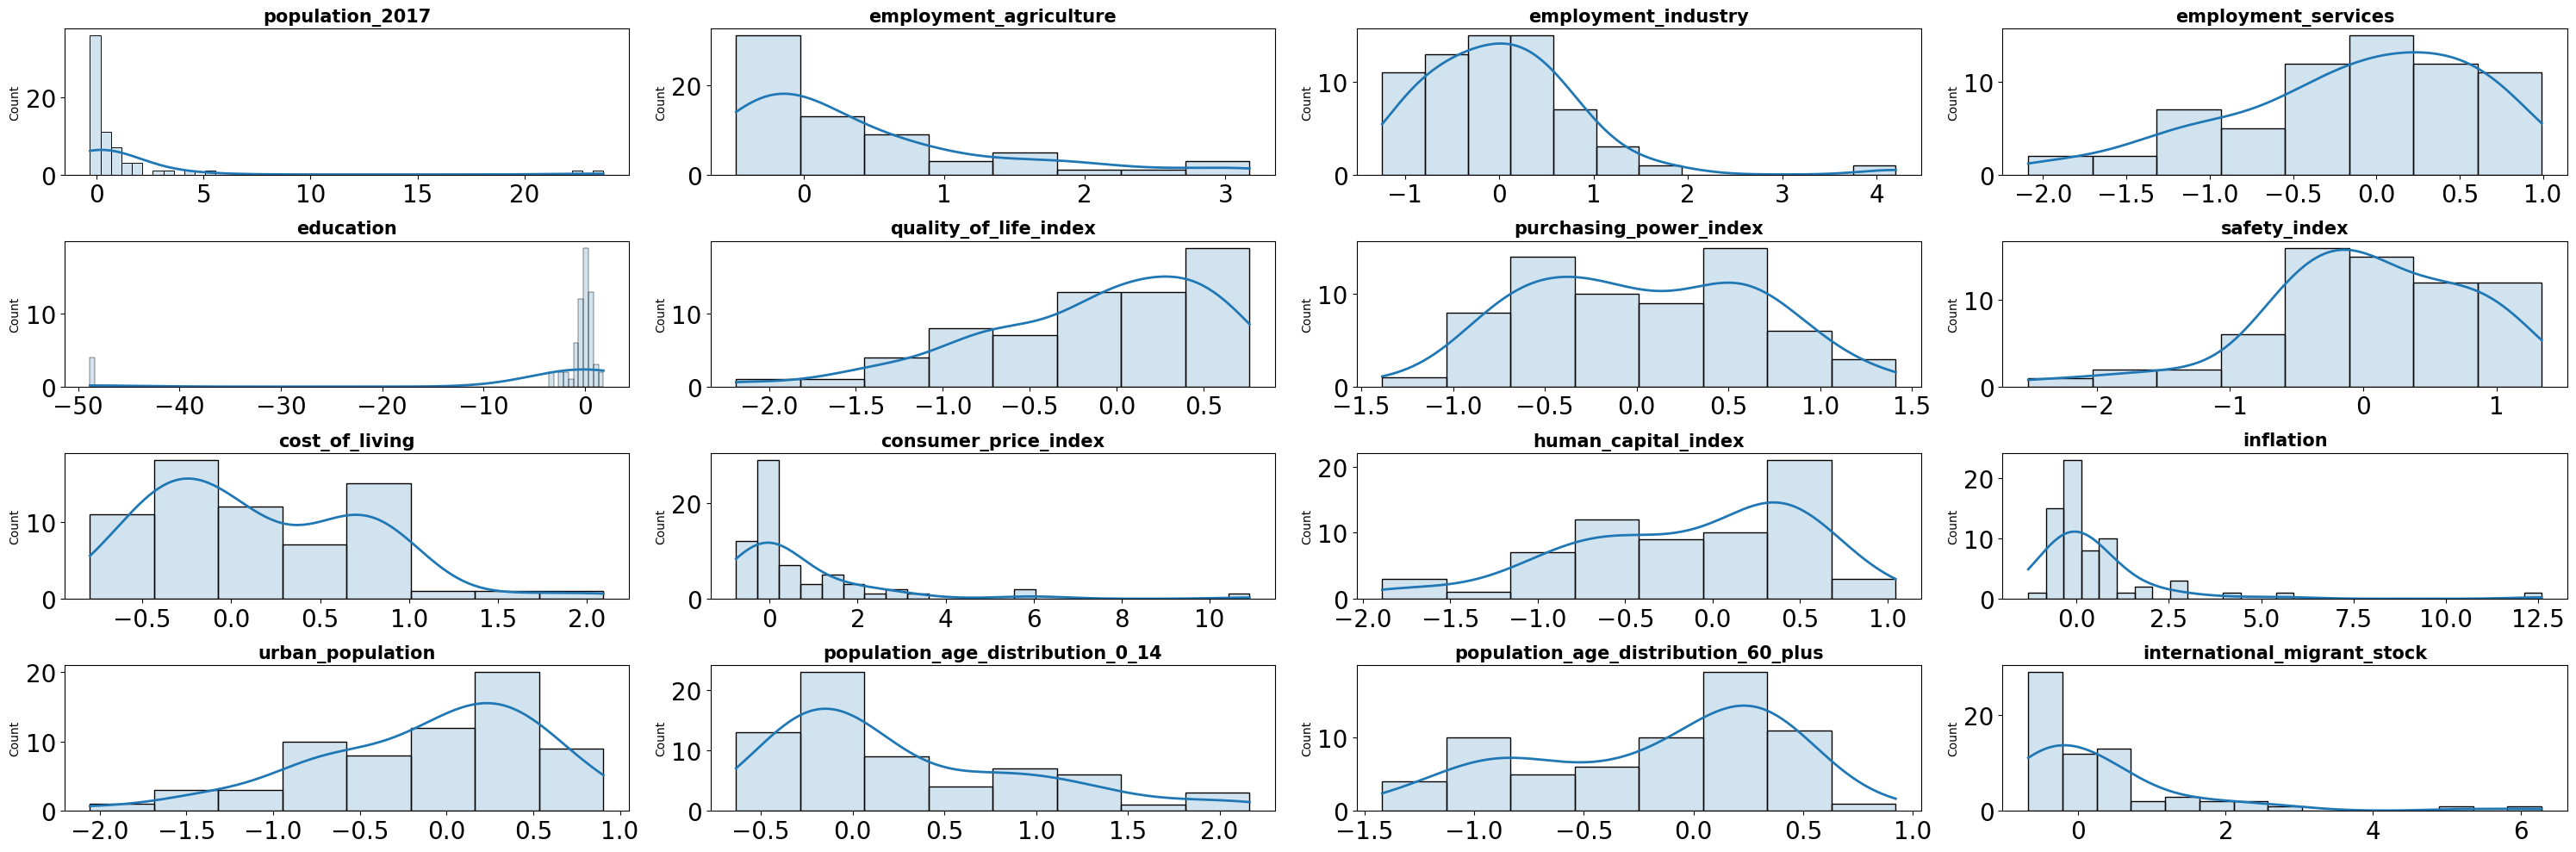

In [10]:
# comprobamos los histogramas después de la estandarización con los previos
fig, axes = plt.subplots(4,4 , figsize = (30, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat

for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

In [11]:
# sobreescribimos las columnas estandarizadas
df[numericas_robust.columns] = numericas_robust

In [12]:
# vamos a eliminar la columna de respuesta antes de normalizar, ya que tenemos la otra en el dataframe
df.drop("restaurant_price_index", axis = 1, inplace = True)

In [13]:
df.head()

country         region  population_2017  employment_agriculture  \
0  Argentina   SouthAmerica         0.432582               -0.331263   
1  Australia        Oceania         0.095085               -0.273292   
2    Austria  WesternEurope        -0.172512               -0.107660   
3    Belarus  EasternEurope        -0.160047                0.298137   
4    Belgium  WesternEurope        -0.126655               -0.397516   

   employment_industry  employment_services  education  quality_of_life_index  \
0             0.131944             0.315638   0.258824              -0.022740   
1            -0.368056             0.487805   0.211765               0.550795   
2             0.243056             0.120516   0.352941               0.765464   
3             1.131944            -0.527977   0.070588              -0.338766   
4            -0.368056             0.573888   0.870588               0.302134   

   purchasing_power_index  safety_index  cost_of_living  consumer_price_index  \
0               -0.243315     -1.258757        0.080347             -0.036551   
1                0.660990     -0.139554        0.893666              0.102195   
2                0.530557      1.143569        0.629026              0.018589   
3               -0.699621      0.976879       -0.461962              1.234337   
4                0.434187     -0.255296        0.740210             -0.024568   

   human_capital_index  inflation  urban_population  \
0            -0.572700   0.374915          0.605509   
1             0.566766  -0.030665          0.393466   
2             0.507418   0.030085         -0.615413   
3            -0.077916   1.839723          0.111590   
4             0.293769   0.050562          0.830865   

   population_age_distribution_0_14  population_age_distribution_60_plus  \
0                          0.927114                            -0.437736   
1                          0.239067                            -0.015094   
2                         -0.332362                             0.294340   
3                         -0.029155                             0.007547   
4                          0.017493                             0.256604   

   international_migrant_stock  restaurant_price_index_normal  
0                    -0.307692                       4.246653  
1                     1.538462                       4.749998  
2                     0.694280                       4.581754  
3                     0.213018                       3.906126  
4                     0.284024                       4.828160

Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [14]:
df.to_csv('datos/soci_econ_country_profiles_estandarizado.csv')